## Lab 6 - Model comparison

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Excercise 1 - generate data

In [2]:
F = len("Agnieszka")
L = len("Kojs")
N = (L+F)*100

In [3]:
gen_quant1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
samples1 = gen_quant1.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
samples_df1 = samples1.draws_pd()
samples_df1

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.01,0.659195,-2.06253,0.34185,0.556113,1.40897,1.48041,-0.728814,...,1.33337,-0.240439,-0.008007,-1.6958,-1.64295,0.213852,0.703792,-0.972546,1.18799,-1.71259


In [6]:
# Generation of data
y1_sample = samples_df1.iloc[0][3:]
y1_sample

y[1]       0.659195
y[2]      -2.062530
y[3]       0.341850
y[4]       0.556113
y[5]       1.408970
             ...   
y[1296]    0.213852
y[1297]    0.703792
y[1298]   -0.972546
y[1299]    1.187990
y[1300]   -1.712590
Name: 0, Length: 1300, dtype: float64

In [7]:
gen_quant2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [8]:
samples2 = gen_quant2.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [9]:
samples_df2 = samples2.draws_pd()
samples_df2

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.097229,-0.003449,0.424695,-1.41868,1.16106,0.214122,0.367582,0.962505,...,-3.92568,-1.08111,3.27457,0.347881,1.65311,-4.39183,0.890055,-0.740453,2.13262,-2.7608


In [10]:
# Generation of data
y2_sample = samples_df2.iloc[0][-1300:]
y2_sample

y[1]       0.266908
y[2]      -1.174270
y[3]      -0.840099
y[4]      -2.900420
y[5]       4.096350
             ...   
y[1296]   -4.391830
y[1297]    0.890055
y[1298]   -0.740453
y[1299]    2.132620
y[1300]   -2.760800
Name: 0, Length: 1300, dtype: float64

In [11]:
X_1_be = samples_df2.iloc[0][2:1302].array
X_1 = X_1_be.reshape(1300,1)

In [12]:
X_2 = samples_df2.iloc[0][1302:2602]
X_2

X[1,2]       0.582150
X[2,2]      -0.767182
X[3,2]       0.575602
X[4,2]      -0.807757
X[5,2]       1.545710
               ...   
X[1296,2]    0.870620
X[1297,2]    1.418410
X[1298,2]   -0.513232
X[1299,2]    1.079820
X[1300,2]   -1.256340
Name: 0, Length: 1300, dtype: float64

In [13]:
X_3 = samples_df2.iloc[0][2602:3902]
X_3

X[1,3]      -0.000870
X[2,3]       1.280870
X[3,3]      -0.756223
X[4,3]       1.596260
X[5,3]       0.159070
               ...   
X[1296,3]   -0.036463
X[1297,3]    0.362996
X[1298,3]   -1.325360
X[1299,3]    2.297560
X[1300,3]    0.365491
Name: 0, Length: 1300, dtype: float64

In [14]:
X_2_matrix = np.vstack((X_1_be, X_2)).reshape(1300, 2)
X_2_matrix

array([[ 0.0972294 , -0.00344931],
       [ 0.424695  , -1.41868   ],
       [ 1.16106   ,  0.214122  ],
       ...,
       [ 0.473725  ,  0.87062   ],
       [ 1.41841   , -0.513232  ],
       [ 1.07982   , -1.25634   ]])

In [15]:
X_3_matrix = np.transpose(np.vstack((X_1_be, X_2, X_3)))
X_3_matrix

array([[ 9.72294e-02,  5.82150e-01, -8.69526e-04],
       [-3.44931e-03, -7.67182e-01,  1.28087e+00],
       [ 4.24695e-01,  5.75602e-01, -7.56223e-01],
       ...,
       [-8.48210e-02, -5.13232e-01, -1.32536e+00],
       [-3.28479e-01,  1.07982e+00,  2.29756e+00],
       [-3.29649e-01, -1.25634e+00,  3.65491e-01]])

### Excercise 2 - compare normal and student models for data from first file

In [16]:
model_1 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [17]:
samp_model1 = model_1.sample(data={'N': N, 'y': y1_sample})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed                       
chain 4 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [18]:
fit_model_1 = samp_model1.draws_pd()
fit_model_1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
0,-2684.41,0.808340,0.871671,1.0,3.0,0.0,2688.00,1.93829,0.221400,-1.60625,...,-1.073850,1.259880,-1.483450,2.682230,-0.836429,1.199940,2.568180,-4.151640,-0.370971,1.277450
1,-2685.05,0.921564,0.871671,2.0,3.0,0.0,2685.54,1.90828,0.269653,-1.58598,...,0.080723,-0.181961,0.466915,2.414150,1.936940,-1.628440,0.262831,0.133514,-0.126505,-0.654828
2,-2684.06,0.758794,0.871671,2.0,3.0,0.0,2687.94,1.93029,0.191501,-1.60596,...,0.132234,0.409598,0.555319,-1.236130,-0.939522,-1.104400,-0.855172,0.179841,2.353310,-2.078170
3,-2684.35,0.906174,0.871671,2.0,3.0,0.0,2684.90,1.90126,0.240582,-1.58570,...,1.878050,0.451229,0.422485,0.609622,-1.182770,1.376100,-0.053724,-3.178600,-0.124117,2.782180
4,-2684.22,0.987199,0.871671,2.0,3.0,0.0,2684.70,1.93385,0.211169,-1.60529,...,-1.275930,1.146840,3.453860,2.475300,0.836395,-1.526840,2.138890,-2.139340,-0.748978,0.444177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2684.46,0.964142,0.766265,2.0,7.0,0.0,2684.92,1.94658,0.202415,-1.61255,...,-0.881590,1.869680,-1.738460,0.853426,1.087720,0.055422,-1.133440,-1.093550,-3.112520,-1.919800
3996,-2684.34,0.994857,0.766265,3.0,7.0,0.0,2684.94,1.91826,0.136882,-1.60743,...,1.745300,3.807600,0.792150,0.667018,-0.332574,4.165030,4.566220,-1.218980,2.404410,3.693350
3997,-2685.00,0.932278,0.766265,2.0,3.0,0.0,2685.36,1.88801,0.111165,-1.59659,...,-2.940750,-1.669780,-0.738032,0.067238,-0.280153,-0.791604,-2.742430,-2.643200,-0.244893,1.869810
3998,-2685.24,0.986650,0.766265,3.0,7.0,0.0,2685.98,1.93340,0.106651,-1.61906,...,-0.029175,-0.865706,0.446594,-2.152250,1.543240,0.117589,1.552000,-0.976471,-1.579640,-0.571470


In [19]:
model_2 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [20]:
samp_model2 = model_2.sample(data={'N': N, 'y': y1_sample})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:05 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:06 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:07 Iteration: 1700 /


INFO:cmdstanpy:CmdStan done processing.


In [21]:
fit_model_2 = samp_model2.draws_pd()
fit_model_2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
0,-1976.42,0.837712,0.717356,3.0,7.0,0.0,1979.20,0.789310,0.049536,3.17747,...,0.284591,-1.358070,0.854549,1.799320,0.478980,0.742225,1.125640,-1.764940,0.011908,-0.651787
1,-1977.47,0.911220,0.717356,2.0,3.0,0.0,1977.72,0.785656,0.071056,3.05647,...,0.205475,-1.259760,-0.537868,-0.316577,0.860065,-0.692643,-3.502850,2.051750,-0.303855,-0.105670
2,-1977.06,0.981161,0.717356,2.0,3.0,0.0,1978.13,0.779816,0.041134,3.07054,...,0.764760,0.138598,0.001998,1.272310,0.408573,-3.799980,-0.173429,2.167590,-0.918943,3.309500
3,-1979.66,0.861406,0.717356,2.0,3.0,0.0,1979.90,0.762714,-0.004570,3.01558,...,1.674050,-0.240133,-0.090923,0.172713,0.608201,1.569420,1.311410,-0.722799,0.545874,-1.549900
4,-1976.99,0.908361,0.717356,2.0,3.0,0.0,1980.90,0.823755,0.059948,3.18643,...,0.299226,-0.581046,1.401590,0.412322,0.385214,0.630800,1.220000,-0.483729,1.581390,-0.246806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1975.80,0.996157,0.655997,2.0,7.0,0.0,1976.67,0.818171,0.038086,3.47927,...,-0.569526,-0.274905,-0.865874,-1.764810,0.639648,0.114619,0.689435,-0.483158,0.833013,1.744550
3996,-1977.83,0.684940,0.655997,2.0,3.0,0.0,1978.71,0.850687,0.034912,3.36126,...,0.316316,-0.808527,-0.833802,-0.359169,0.164137,-1.039860,-10.947000,0.074846,-1.322040,1.995940
3997,-1976.35,0.977364,0.655997,2.0,7.0,0.0,1978.83,0.800768,0.023786,3.24677,...,-0.055098,-0.061498,-0.646946,-0.913071,1.726650,0.466949,4.311310,3.320010,0.143897,-0.038161
3998,-1976.51,0.918100,0.655997,2.0,7.0,0.0,1977.41,0.828599,0.039787,3.30466,...,0.551874,1.524310,-0.300149,-0.702470,-1.601280,-1.337500,3.703890,0.987391,-0.170737,0.873652


Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

In [22]:
compare_dict = {"Model 1": samp_model1, "Model 2": samp_model2}
model_comapre_1 = az.compare(compare_dict, ic="loo")
model_comapre_1

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Model 2,0,-1977.400029,4.699766,0.000000,1.000000e+00,43.263745,0.000000,False,log
Model 1,1,-2702.201852,35.290808,724.801823,4.440892e-16,162.135309,131.595906,True,log


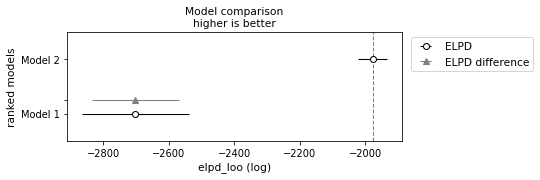

In [23]:
az.plot_compare(model_comapre_1)
plt.show()

In [24]:
model_comapre_2 = az.compare(compare_dict, ic="waic")

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


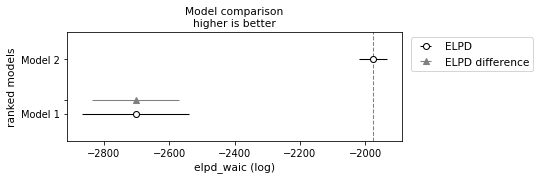

In [25]:
az.plot_compare(model_comapre_2)
plt.show()

### Excercise 3 - compare models with different numbers of predictors

In [26]:
K = [1, 2, 3]
model_3 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [27]:
samp_model3_1 = model_3.sample(data={'N': N, 'K': K[0], 'y': y2_sample, "X": X_1})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status

chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:04 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:05 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:05 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:06 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:07 Iteration: 1600 / 20


INFO:cmdstanpy:CmdStan done processing.


In [28]:
samp_model3_2 = model_3.sample(data={'N': N, 'K': K[1], 'y': y2_sample, "X": X_2_matrix})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:05 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:06 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:06 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:07 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:08 Iteration: 1800 / 2


INFO:cmdstanpy:CmdStan done processing.


In [29]:
samp_model3_3 = model_3.sample(data={'N': N, 'K': K[2], 'y': y2_sample, "X": X_3_matrix})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:05 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:05 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:06 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:07 Iteration: 1800


INFO:cmdstanpy:CmdStan done processing.


Compare models for 1, 2 and 3 predictors as in previous excercise

In [30]:
compare_dict = {"1 predictor": samp_model3_1, "2 predictors": samp_model3_2, "3 predictors": samp_model3_3}
model_comapre3_loo = az.compare(compare_dict, ic="loo")
model_comapre3_loo

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
3 predictors,0,-1846.572477,3.942922,0.000000,1.000000e+00,25.344621,0.000000,False,log
1 predictor,1,-2343.299296,1.858655,496.726819,3.519314e-08,25.031182,25.781384,False,log
2 predictors,2,-3053.928432,3.153236,1207.355955,0.000000e+00,26.308713,32.222040,False,log


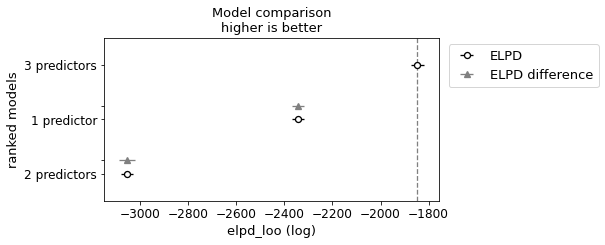

In [31]:
az.plot_compare(model_comapre3_loo)
plt.show()

In [32]:
model_comapre3_waic = az.compare(compare_dict, ic="waic")
model_comapre3_waic 

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
3 predictors,0,-1846.567055,3.937500,0.000000,1.000000e+00,25.344352,0.000000,False,log
1 predictor,1,-2343.297298,1.856657,496.730243,8.453278e-08,25.031072,25.781219,False,log
2 predictors,2,-3053.924230,3.149034,1207.357175,0.000000e+00,26.308477,32.221808,False,log


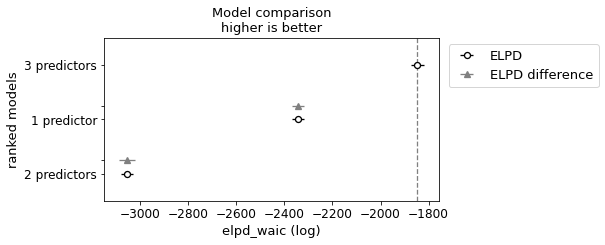

In [33]:
az.plot_compare(model_comapre3_waic)
plt.show()